## Notebook 2 - Trabajo Final Estadística para Data Science
### Programa: Magister en Data Sciences

<hr>
<b> Integrantes: </b>

<ul>
<li>Nicolas Pastor</li>
<li>Nicolas Klein</li>
<li>Luis Ramirez Vera</li>
</ul>
<hr>

# Trabajo final

### Durante algunas sesiones de clase utilizamos el data set 'cars', sobre el cual estuvimos explorando las variables (a través de medidas numéricas descriptivas) y las estructuras de correlación entre éstas. Inclusive, realizamos algunas pruebas gráficas de ajuste de la variable 'Invoice' a la distribución normal, probando transformaciones para favorecer su aproximación a la misma. Utilizamos también el 'boxplot' para comparar, cuál de los tres orígenes (Asiático, Americano y Europeo) presentaba, en términos de la mediana, la mayor potencia (Horsepower). Se presentan, a continuación, algunas ventanas como muestra de estas actividades:

In [23]:
# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Invocación de los datos
df_train = pd.read_excel(os.getcwd() + '/cars.xlsx')
df_train.head(5)

Make            Model   Type Origin DriveTrain   MSRP  Invoice  \
0  Acura              MDX    SUV   Asia        All  36945    33337   
1  Acura   RSX Type S 2dr  Sedan   Asia      Front  23820    21761   
2  Acura          TSX 4dr  Sedan   Asia      Front  26990    24647   
3  Acura           TL 4dr  Sedan   Asia      Front  33195    30299   
4  Acura       3.5 RL 4dr  Sedan   Asia      Front  43755    39014   

   EngineSize Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  \
0         3.5         6         265        17           23    4451        106   
1         2.0         4         200        24           31    2778        101   
2         2.4         4         200        22           29    3230        105   
3         3.2         6         270        20           28    3575        108   
4         3.5         6         225        18           24    3880        115   

   Lenght  
0     189  
1     172  
2     183  
3     186  
4     197

In [25]:
# Resumen de estadísticos descriptivos para variables numéricas
df_train.describe()

MSRP        Invoice  EngineSize  Horsepower    MPG_City  \
count     428.000000     428.000000  428.000000  428.000000  428.000000   
mean    32774.855140   30014.700935    3.196729  215.885514   20.060748   
std     19431.716674   17642.117750    1.108595   71.836032    5.238218   
min     10280.000000    9875.000000    1.300000   73.000000   10.000000   
25%     20334.250000   18866.000000    2.375000  165.000000   17.000000   
50%     27635.000000   25294.500000    3.000000  210.000000   19.000000   
75%     39205.000000   35710.250000    3.900000  255.000000   21.250000   
max    192465.000000  173560.000000    8.300000  500.000000   60.000000   

       MPG_Highway       Weight   Wheelbase      Lenght  
count   428.000000   428.000000  428.000000  428.000000  
mean     26.843458  3577.953271  108.154206  186.362150  
std       5.741201   758.983215    8.311813   14.357991  
min      12.000000  1850.000000   89.000000  143.000000  
25%      24.000000  3104.000000  103.000000  178.000000  
50%      26.000000  3474.500000  107.000000  187.000000  
75%      29.000000  3977.750000  112.000000  194.000000  
max      66.000000  7190.000000  144.000000  238.000000

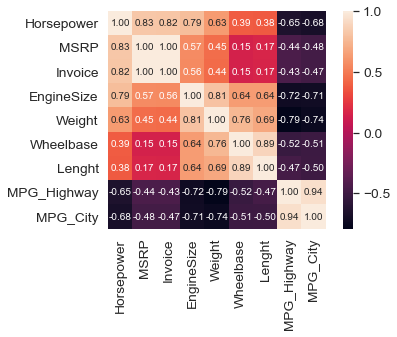

In [26]:
# Matriz de correlaciones lineales entre todas las variables numéricas
corrmat = df_train.corr()
k = 10
cols = corrmat.nlargest(k, 'Horsepower')['Horsepower'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

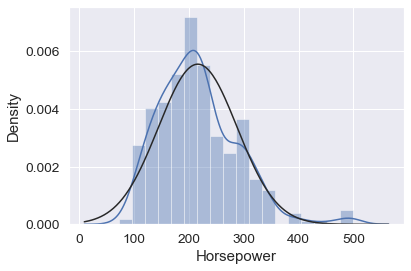

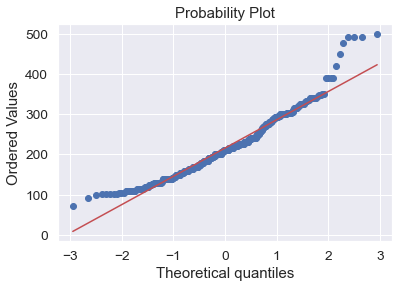

In [27]:
# Exámen de distribución de los datos
sns.distplot(df_train['Horsepower'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Horsepower'], plot=plt)

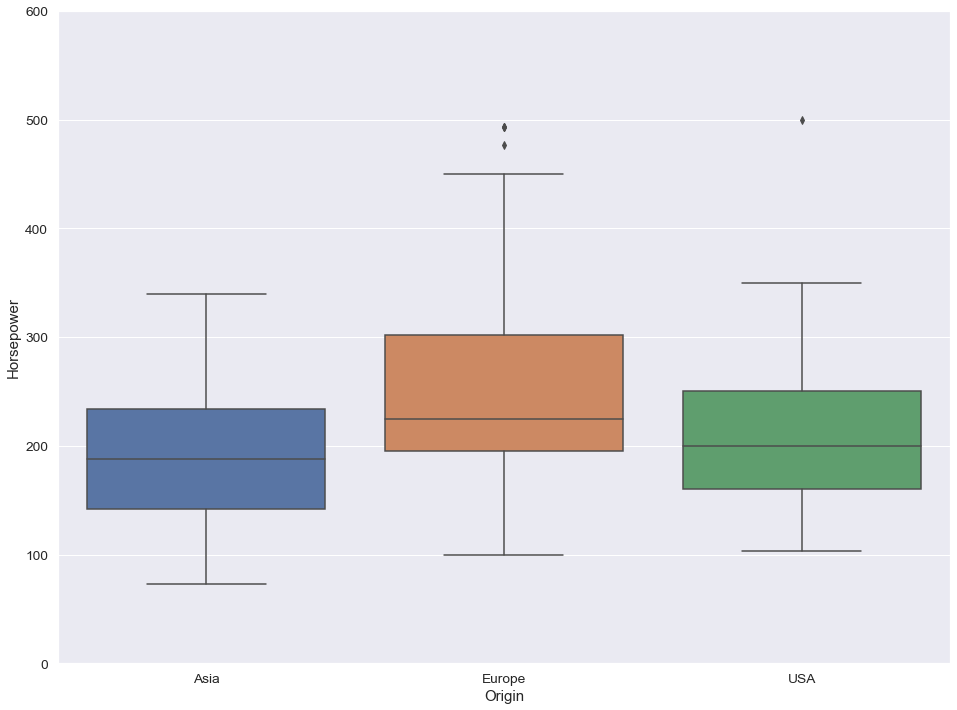

In [28]:
# Diagrama de caja para Horsepower vs Origin
var = 'Origin'
data = pd.concat([df_train['Horsepower'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x=var, y="Horsepower", data=data)
fig.axis(ymin=0, ymax=600);

### Ahora bien, nos enfrentamos al siguiente desafío: El especialista en negocios necesita responder las siguientes inquietudes:

### I. El 'boxplot' pareciera indicar que, en términos de la mediana, los autos europeos tienen una potencia (Horsepower) mayor que el resto de los orígenes... ¿Pasará lo mismo con los promedios? ¿Existirá diferencia significativa al 5% entre las potencias promedio de los tres orígenes?

### Procedimiento: 

###### 1. Verificar que la variable en cuestión se ajuste convenientemente a la distribución normal (usar prueba analítica para concluir).
###### 2. Verificar que exista homogeneidad de varianza en las potencias de los tres orígenes (usar prueba analítica para concluir).
###### 3. Utilizar una prueba de hipótesis estadística para responder al especialista de negocio esta inquietud (utilizar nivel de significación de 5%). Explicar razonablemente porqué ha elegido esa prueba.

### II. Supongamos que SOLAMENTE se tiene interés en comparar los autos americanos con los europeos, en término de la potencia (Horsepower) promedio: ¿Utilizaría usted la misma prueba de hipótesis que utilizó para el caso anterior? Responda razonablemente.

### III. Basándonos en la situación descrita en el punto anterior (II), utilizar una prueba de hipótesis estadística adecuada para responder al especialista de negocio (utilizar nivel de significación de 5%).

### IV. Si el especialista de negocio, en lugar de comparar la potencia promedio por orígen, necesita ESTIMAR la potencia promedio de los autos americanos: ¿Qué método de estimación de parámetros utilizaría? Responda razonablemente.

### V. Realice la estimación de parámetros requerida en el punto anterior (IV). Utilizar nivel de confianza de 95%.


### VI. Con relación a la variable 'Horsepower', indique:

###### 1. ¿Qué tipo de variable es? ¿En qué escala de medida se encuentra?

###### 2. Si no observa adecuado ajuste a la distribución normal: ¿Cómo podría explicarlo?

###### 3. Las mediciones de potencia (Horsepower) obtenidas para los autos americanos, provienen de un censo o de una selección del universo bajo estudio? Explique razonablemente.

### VII. Por último: Con relación al punto II, donde el especialista de negocio SOLAMENTE tiene interés en comparar los autos americanos con los europeos, en término de la potencia (Horsepower), indique si los dos conjuntos de datos a comparar corresponden con dos muestras relacionadas o independientes. Explique razonablemente.



### Entrega: Desarrolle todas sus respuestas en un notebook y envíelo ÚNICAMENTE en formato pdf al email a.ascanio@udd.cl antes del sábado 7 de agosto a las 23:59 h. No olvide colocar en el mismo los nombres de los integrantes. Cada pregunta vale 1 punto.

# "Sólo creo en Dios, todos los demás… ¡Traigan Datos!" -Edwards Deming

In [29]:
# Respuesta 1.1
# Se crea funcion para verificar el aguste de la variable a la distribucion normal 
# usando la pruena de Anderson-Darling.

# H0: Hipotesis nula: Los datos de la variable 'HorsePower' siguen una distribucion normal
# HA: Hipotesis alternativa: Los datos de la variable 'HorsePower' no siguen una
#.    distribucion normal

def verifyAndersonDarlingTest(variable, distrubutionType) :

    andersonDarling = stats.anderson(variable, dist = distrubutionType)

    rejectedNullHipothesis = False
    for value in andersonDarling[1] :
        if(andersonDarling[0] > value) :
            rejectedNullHipothesis = True
    
    return {
        "statistic" : andersonDarling[0], 
        "rejectedNullHipothesis" : rejectedNullHipothesis
    }

print(verifyAndersonDarlingTest(df_train['Horsepower'], 'norm'));

# Estadistico de prueba: 3.6858051907815934
# Rechazo de hipotesis nula: verdadero

# Interpretacion: se rechaza la hipotesis de que la variable 'HorsePower' se ajuste a la 
# distribucion normal.

{'statistic': 3.6858051907815934, 'rejectedNullHipothesis': True}


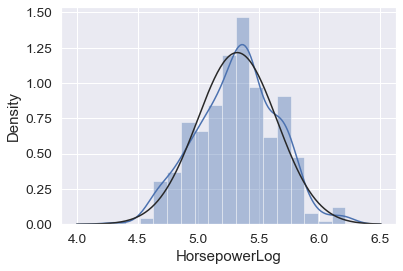

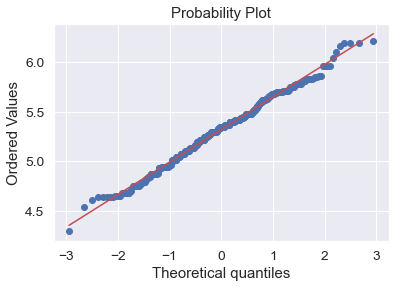

In [30]:
# Respuesta 1.1.1 (adicional)
############################################################################################################

# Aplicacion de transformación logarítmica. 
# Tras la aplicación se aprecia un mejor ajuste de la variable hacia la distribución normal.
df_train['HorsepowerLog'] = np.log(df_train['Horsepower'])

sns.distplot(df_train['HorsepowerLog'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['HorsepowerLog'], plot=plt)

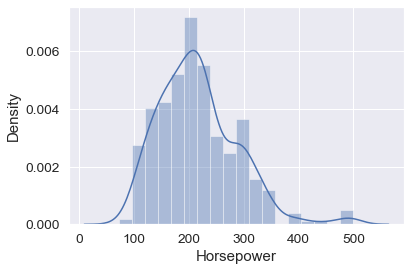

In [31]:
# Visualizacion de la variable 'Horsepower' en el histograma.
# Histograma.
sns.distplot(df_train['Horsepower']);

In [32]:
# Respuesta 1.2 - Para verificar la homogeneidad de las varianzas se aplica la prueba de Levene

# Se utiliza prueba de Levene para verificar si hay homocedasticidad entre varianzas de dos o mas 
# grupos de una misma variable.

# H0: Hipotesis nula: Las potencias de todos los Origenes tienen igual varianza. 
# HA: Hipotesis alternativa: Las potencias de todos los Origenes tienen significantes desviaciones 
#     de normalidad 

from scipy.stats import levene

asiaHorsePower = dfOrigin.get_group('Asia')['Horsepower']
europaHorsePower = dfOrigin.get_group('Europe')['Horsepower']
usaHorsePower = dfOrigin.get_group('USA')['Horsepower']

stat, p = levene(asiaHorsePower, europaHorsePower, usaHorsePower)

print(p)

if(p > 0.05) :  
    print("El nivel de significancia es mayor al 5%, por lo tanto se asume que hay homogeneidad ", 
          "de varianzas.")
else :
    print("El nivel de significancia es menor al 5%, por lo tanto NO se puede asumir que hay ",
          "homogeneidad de varianza.")
    
# Conclusión: Dados los resultados del analisis usando el test de levene, 
# se acepta la hipotesis nula. 

0.0648735980454454

###### Se usa el test de Levene, ya que la variable 'HorsePower', no se ajusta a la distribucion normal 
###### De esta forma,  no se puede usar el test de Bartlett, ya que no seria preciso, en ditribuciones 
###### no normales

0.0648735980454454
El nivel de significancia es mayor al 5%, por lo tanto se asume que hay homogeneidad de varianzas.


0.0648735980454454

In [33]:
# Respuesta 1.3

# H0: Hipotesis nula: las medias de los grupos son estadisticamente significativos
# HA: Hipotesis alterna: las medias de los grupos no son estadisticamente significativos

import scipy.stats

ALPHA = 0.05

dfOrigin = df_train.groupby('Origin')

asiaHorsePower = dfOrigin.get_group('Asia')['Horsepower']
europaHorsePower = dfOrigin.get_group('Europe')['Horsepower']
usaHorsePower = dfOrigin.get_group('USA')['Horsepower']

stat, pValue = stats.f_oneway(asiaHorsePower, europaHorsePower, usaHorsePower)
print(pValue)

if pValue < ALPHA:    
    print("El nivel de significancia es menor al 5%, por lo tanto existe diferencia significativa en los"
          ,"promedios de las potencias de los 3 origenes de automoviles en estudio")
else:
    print("El nivel de significancia es mayor al 5%, por lo tanto NO existe diferencia significativa en ",
          "los promedios de las potencias de los 3 origenes de automoviles en estudio")


2.301839166217464e-12
El nivel de significancia es menor al 5%, por lo tanto existe diferencia significativa en los promedios de las potencias de los 3 origenes de automoviles en estudio


In [34]:
# Resuesta 2 - Dado que en este requerimiento, es necesario evaluar 2 conjuntos de datos donde se quiere 
# comparar los autos americanos con los europeos en términos potencia promedio, utilizaremos la prueba de
# T-Student, la cual permite determinar si hay una diferencia significativa entre las medias de dos grupos.

In [35]:
# Resuesta 3 . Ejecución de la prueba de T-Student utilizando las muestra de potencia de los autos 
#              americanos y europeos. 

# H0: Hipotesis nula. Las potencias promedio de los autos americanos y europeos son similares. 
# HA: Hipotesis alternativa. Las potencias promedio de los autos americanos y europeos son diferentes. 

from scipy.stats import ttest_ind

t_stat, p = ttest_ind(europaHorsePower, usaHorsePower, equal_var=False)
print(f't={t_stat}, p={p}')

# Nivel de significancia
ALPHA = 0.05

if(p > ALPHA) :  
    print("El nivel de significancia es mayor al 5%, por lo tanto se asume que NO hay diferencia ", 
          "significativa en las potencias medias.")
else :
    print("El nivel de significancia es menor al 5%, por lo tanto existen diferencias significativas",
          "en las potencias medias de los autos.")    

# Conclusión: Dados los resultados del analisis usando el test de T-Student, se rechaza la hipotesis 
# nula y podemos concluir que los autos americanos y europeos tienen diferencias significativas en las 
# potencias promedio.

t=4.350824708902668, p=2.039354585331438e-05
El nivel de significancia es menor al 5%, por lo tanto existen diferencias significativas en las potencias medias de los autos.


In [36]:
# Resuesta 4 - Para la estimación de Potencia promedio se recomienda utilizar el método de intervalos 
# de confianza, dado que permite considerar un error estándar que ayuda al hecho de no contar con la 
# población completa si no que con una muestra aleatoria de los elementos. 
# En este sentido el intervalo nos proporciona un rango probable donde se puede encontrar la 
# potencia promedio.


In [37]:
# Resuesta 5 - Ejecución del método de intervalos de confianza con un nivel de confianza del 95%.

import numpy as np
from scipy import stats
from scipy.stats import sem, t

CONFIDENCE = 0.95

#Calculo de la potencia promedio mediante el metodo de intervalos de confianza.

## Filtrar solo los autos americanos.
df_autos_americanos = df_train[df_train['Origin'] =='USA']

n = len(df_autos_americanos[['Horsepower']])
m = np.mean(df_autos_americanos[['Horsepower']])
print("n =", n)
print("Media =", m)


std_err = sem(df_autos_americanos[['Horsepower']])
print("Error estándar =", std_err)


h = std_err * t.ppf((1 + CONFIDENCE) / 2, n-1)
print("h =", h)


start = m - h
print(start)

end = m + h
print(end)

# Conclusión: El intervalo medio en el que se encuentran las potencias de los autos americanos es 
# entre 202,4317 y 223,2145


n = 147
Media = Horsepower    212.823129
dtype: float64
Error estándar = [5.2578974]
h = [10.39142269]
Horsepower    202.431707
dtype: float64
Horsepower    223.214552
dtype: float64


In [38]:
# Resuesta 6 - Análisis completo de la variable HorsePower
import numpy as np
from scipy import stats
from scipy.stats import sem, t

df_train[['Horsepower']].describe()

# Respuesta 6.1
# La variable Horsepower es una variable cuantitativa del tipo Discreta.  
# Se encuentra en escala de razón. 

# Respuesta 6.2
# Realizando pruebas con diagramas de distribución por los distintos Origenes, podemos apreciar 
# que hay ciertas potencias de vehiculos que cuentan con menor cantidad de datos para ser analizados,
# lo que afecta la normalidad de la distribución de la variable. 

# Respuesta 6.3 
# Es una selección del universo bajo estudio, dado que la muestra contiene sólo algunas marcas, 
# modelos y potencias, elegidos de manera aleatoria, y no se incluye amplia gama del 
# universo de vehiculos y todas sus variantes de potencia.  



Horsepower
count  428.000000
mean   215.885514
std     71.836032
min     73.000000
25%    165.000000
50%    210.000000
75%    255.000000
max    500.000000

In [39]:
# Respuesta 7 - Verificar si las muestras de los autos Americanos y Europeos son muestras
#               relacionadas o independientes.

## Se realizará el análisis estadístico para verificar si las muestras son relacionadas o 
## independeintes entre si.
## Para ello se realzarán 2 pruebas que permitirán comprobar la hipotesis nula. 

# Importación de librerías
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
import researchpy as rp

In [40]:
# Para realizar este analisis primero revisamos el tamaño de las muestras

dfOrigin = df_train.groupby('Origin')

asiaHorsePower = dfOrigin.get_group('Asia')['Horsepower']
europaHorsePower = dfOrigin.get_group('Europe')['Horsepower']
usaHorsePower = dfOrigin.get_group('USA')['Horsepower']

print('Tamaño de muestra USA:', len(usaHorsePower))
print('Tamaño de muestra Europa:', len(europaHorsePower))
# Con estos datos podemos tener un indicio inicial de que no estamos tratando con las mismas muestras 
# dado que no tienen el mismo numero de obseraciones (elementos) .

Tamaño de muestra USA: 147
Tamaño de muestra Europa: 123


In [41]:
# Realizamos un describe() para las 2 muestras en estudio. 
df_train[df_train['Origin'].isin(['USA','Europe'])].groupby("Origin")['Horsepower'].describe()
# En esta tabla podemos ver que existen diferencias en los parametros entregados para cada Origen. 

count        mean        std    min    25%    50%    75%    max
Origin                                                                 
Europe  123.0  251.894309  80.738884  100.0  195.5  225.0  302.0  493.0
USA     147.0  212.823129  63.748618  103.0  160.0  200.0  250.0  500.0

In [42]:
# Estadísticos descriptivos desde researchpy.summary_cont()
rp.summary_cont(df_train[df_train['Origin'].isin(['USA','Europe'])].groupby("Origin")['Horsepower'])

N      Mean       SD      SE  95% Conf.  Interval
Origin                                                     
Europe  123  251.8943  80.7389  7.2800   237.4829  266.3058
USA     147  212.8231  63.7486  5.2579   202.4317  223.2146

### Comparación de dos muestras independientes

In [43]:
## Prueba con funcion programada para verificar si las muestras son independientes. 
 
# Prueba T de Student para dos muestras independientes
def independent_ttest(data1, data2, alpha):
    
    # Cálculo de los promedios
    mean1, mean2 = mean(data1), mean(data2)
    
    # Cálculo del error estándar de cada muestra 
    se1, se2 = sem(data1), sem(data2)
    
    # Cálculo del error estándar conjunto
    sed = sqrt(se1**2.0 + se2**2.0)
     
    # Cálculo del estadístico T
    t_stat = (mean1 - mean2) / sed
     
    # Grados de libertad
    df = len(data1) + len(data2) - 2
    
    # Cálculo del valor crítico
    cv = t.ppf(1.0 - alpha, df)
    
    # Cálculo del p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    
    # Resumen
    return t_stat, df, cv, p
 
# Cálculo del estadístico T
alpha = 0.05
t_stat, df, cv, p = independent_ttest(usaHorsePower, europaHorsePower, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

# Interpretación a través del valor crítico
if abs(t_stat) <= cv:
    print('No se encontraron diferencias significativas al 5% entre los promedios de las muestras.')
else:
    print('Se encontraron diferencias significativas al 5% entre los promedios de las muestras, ',
          'ya que el valor calculado del estadístico T supera en valor absoluto al cuantil de la ',
          'respectiva distribución, correspondiente a un nivel de significación del 5%.')

# Interpretación a través del p-value
if p > alpha:
    print('No se encontraron diferencias significativas al 5% entre los promedios de las muestras.')
else:
    print('Se encontraron diferencias significativas al 5% entre los promedios de las muestras, ya que',
          'el valor p-value correspondiente al estadístico T calculado, es menor que el nivel de ',
          'significación establecido.')

t=-4.351, df=268, cv=1.651, p=0.000
Se encontraron diferencias significativas al 5% entre los promedios de las muestras,  ya que el valor calculado del estadístico T supera en valor absoluto al cuantil de la respectiva  distribución, correspondiente a un nivel de significación del 5%.
Se encontraron diferencias significativas al 5% entre los promedios de las muestras, ya que el  valor p-value correspondiente al estadístico T calculado, es menor que el nivel de significación  establecido.


### Aplicación de Prueba T para verificar si las muestras son independientes.

In [44]:
# Prueba de T para dos muestras independientes usando scipy.stats
stats.ttest_ind(usaHorsePower, europaHorsePower)

Ttest_indResult(statistic=-4.441830880861222, pvalue=1.3057281996137737e-05)

In [45]:
descriptives, results = rp.ttest(group1= usaHorsePower, group1_name= "HorsepowerUSA", group2= europaHorsePower, group2_name= "HorsepowerEuropa")
descriptives

Variable      N        Mean         SD        SE   95% Conf.  \
0     HorsepowerUSA  147.0  212.823129  63.748618  5.257897  202.431707   
1  HorsepowerEuropa  123.0  251.894309  80.738884  7.279980  237.482861   
2          combined  270.0  230.622222  74.445795  4.530627  221.702225   

     Interval  
0  223.214552  
1  266.305757  
2  239.542220

In [46]:
results

Independent t-test   results
0  Difference (HorsepowerUSA - HorsepowerEuropa) =   -39.0712
1                             Degrees of freedom =   268.0000
2                                              t =    -4.4418
3                          Two side test p value =     0.0000
4                         Difference < 0 p value =     0.0000
5                         Difference > 0 p value =     1.0000
6                                      Cohen's d =    -0.5428
7                                      Hedge's g =    -0.5413
8                                  Glass's delta =    -0.6129
9                                    Pearson's r =     0.2619

In [49]:
## Interpretación de los resultados en base a una hipotesis:  

# H0: Hipótesis nula: En base al promedio, las muestras analizadas son estadisticamente iguales.  
# HA: Hipótesis alternativa: En base al promedio, las muestras analizadas son 
#     estadisticamente distintas.  

# Análisis de los resultados: 
# Si Two side test p value es menor o igual que el nivel de significación prefijado (alfa) y que, 
# por default, es 0.05 (5%), entonces se procede a rechazar la hipótesis nula.

# Si Two side test p value es mayor que el nivel de significación prefijado (alfa), entonces se 
# procede a "aceptar" la hipótesis nula.

# Nivel de significancia
ALPHA = 0.05

# Obtención del p_value de la prueba T de 2 colas.
p_value = results[results['Independent t-test'].str.contains("Two side test p value")].iloc[0]['results']

#type(p_value)

#Interpretación a través del p-value
if p_value > ALPHA:
    print('No se encontraron diferencias significativas al 5% entre los promedios de las muestras.')
else:
    print('Se encontraron diferencias significativas al 5% entre los promedios de las muestras,', 
          'ya que el valor p-value correspondiente al estadístico T calculado, es menor que el nivel', 
          'de significación establecido.')

# Conclusión: Dado los resultados de la prueba, se rechaza la hipotesis nula, por lo tanto las 
# muestras son distintas. 

Se encontraron diferencias significativas al 5% entre los promedios de las muestras, ya que el valor p-value correspondiente al estadístico T calculado, es menor que el nivel de significación establecido.


In [48]:
#Resumen general



# 1) Verificación del ajuste de los datos a la distribución normal 

# En el punto 1.1 de este informe se realizaron las pruebas de ajuste a la distribución normal, 
# obteniendo como resultado el rechazo de la hipotesis nula, sin embargo al aplicar la función de 
# transformación logarítmica, se logra apreciar un mejor ajuste a la distribución normal. 

###############

# 2) Verificación de la homocedasticidad de los grupos (homogeneidad de varianza dentro de los grupos)

# En el punto 1.2 de este informe se realizan pruebas de homogeneidad de varianza, donde se obtene 
# como resultado que NO se puede rechazar la hipotesis nula, por lo tanto se acepta, lo que indica que 
# ambas muestras tienen homogeneidad de varianza. 

###############

# 3) Prueba de hipotesis para comparacion ANOVA entre variables de los 3 grupos

# En el punto 1.3 de este informe, se realiza prueba de hipotesis ANOVA para dar conclusion de 
# variabilidad entre las potencias de los automoviles, de los 3 grupos de origen, dando como consecuencia, 
# que existe diferencia significativa de promedios de las potencias de los 3 origenes 

###############

# 4) Contrastes entre pruebas de hipotesis

# En el punto 2 de este unfirme, se contrasta la prueba ANOVA (para mas de 2 grupos de variables) y la 
# prueba T-Student explicando que se ocupara esta ultima prueba de hipotesis, ya que es esta es la 
# idonea para el caso de estudio al tener contraste de solo dos variables

###############

# 5) Uso de prueba T-Student

# En el punto 3 de este informe, se contrasta las variables de potencia de automoviles europeos 
# y americanos, dando 
# como resultado, a traves de la prueba de hipotesis T-Student, el rechazo de la hipotesis nula, 
# concluyendo que los automoviles americanos y europeos tienen diferencias significativas en las 
# potencias promedio.

###############

# 6) Estiamcion de parametros con metodo de intervalo de confianza

# En el punto 4 de este informe, se realiza estimacion de parametros, a traves del metodo de 
# intervalos de confanza ya que en este caso, como no se cuenta con la poblacion de estudio completa,
# y solo se cuenta con una muestra aleatoria de las potencias de los automoviles de los mercados 
# Europeo, Americano y Asiatico. El intervalo de confianza, proporciona un rango en el cual, podemos 
# encontrar una potencia promedio

###############

# 7) Desarrollo de estimacion de parametros con metodo de intervalo de confianza

# En el punto 5 de este informe, se realiza la implementacion de un bloque de codigo, para poder 
# llevar a cabo la estimacion de parametros a traves del metodo de intervalo de confianza, para poder 
# inferir que las potencias de los autos americanos es entre 202,4317 y 223,2145

###############

# 8) Analisis de la variable 'HorsePower'

# En el punto 6 de este informe, se realiza un analisis de la variable 'Horsepower' dando 
# como conclusion:
# - La variable, es de tipo cuantitativa discreta y se encuentra en escala de razon
# - No es una variable adecuada a la distribucion normal, ya que esta mestra no es equilibrada en 
#   cantidad de datos de potencias de vehiculos, agrupandolos de acuerdo a su origen
# - Esta variable proviene de una seleccion del universo bajo estudio, debido a que esta muestra 
#   contiene sólo algunas marcas, modelos y potencias, elegidos de manera aleatoria, y no se incluye 
#   amplia gama del universo de vehiculos y todas sus variantes de potencia.

# 9) Analisis de muestra

# En el punto 7 de este informe, se realiza un analisis de la muestra de potencias de automoviles 
# Americanos y Europeos para verificar si estas muestras son relacionadas o independientes. Este estudio
# da  por conclusion, que las muestras de estos origenes enunciados, son totalmente distintos, utilizando 
# un nivel de significancia del 5% en la prueba de hipotesis T de 2 colas, rechazando hipotesis nula
